In [1]:
import numpy as np

# import functions from modsim

from modsim import *

import random
import matplotlib.pyplot as plt

In [2]:
# create a state object to contain the position of a point in 2D

# point 1 of triangle
xr = random.uniform(5,10)
yr = random.uniform(-5,-10)
point1 = State(x=xr, y=yr)

# point 2 of triangle
xr = random.uniform(-2.5,2.5)
yr = random.uniform(5,10)
point2 = State(x=xr, y=yr)

# point 3 of triangle
xr = random.uniform(-5,-10)
yr = random.uniform(-5,-10)
point3 = State(x=xr, y=yr)

# create a system object to contain the system parameters
triangle = System(point1=point1, point2=point2, point3=point3)

In [3]:
def new_point(triangle, point):
    """Computes a new point, based on the triangle and the point.
    
    triangle: System object with three points
    point: State object with x and y
    
    returns: State object with new x and y
    """
    
    # choose one of the three points at random
    i = random.randint(1,3)
    if i == 1:
        p = triangle.point1
    elif i == 2:
        p = triangle.point2
    else:
        p = triangle.point3
        
    # compute the midpoint between the point and the chosen point
    x = (point.x + p.x) / 2
    y = (point.y + p.y) / 2
    
    # make a new point with the midpoint
    return State(x=x, y=y)

In [4]:
def run_simulation(triangle, point, n):
    """Computes a new point, based on the triangle and the point.
    
    triangle: System object with three points
    point: State object with x and y
    n: number of iterations
    
    returns: TimeSeries
    """
    
    #print("Starting point = ",point)
    #print("Triangle = ",triangle)
    #print("Number of iterations = ",n)
    # make a TimeSeries to store the results
    resultsX = TimeSeries()
    resultsY = TimeSeries()
    
    # run n times and store the results
    for i in range(n):
        resultsX[i] = point.x
        resultsY[i] = point.y
        point = new_point(triangle, point)
        #print(point)
    
    #print("Final point = ",point)

    return resultsX, resultsY

In [5]:
def plot_results(resultsX, resultsY):
    """Plot the results.
    
    results: TimeSeries
    """
    
    plt.plot(resultsX, resultsY, 'bo', label='path')

In [6]:
# create a state object to contain the position of a point in 2D

xr = random.uniform(-10,10)
yr = random.uniform(-10,10)
point = State(x=xr, y=yr)

#print ("Triangle = ",triangle)
#print ("Starting point = ",point)

resultsX, resultsY = run_simulation(triangle, point, 10000)


Text(0, 0.5, 'y')

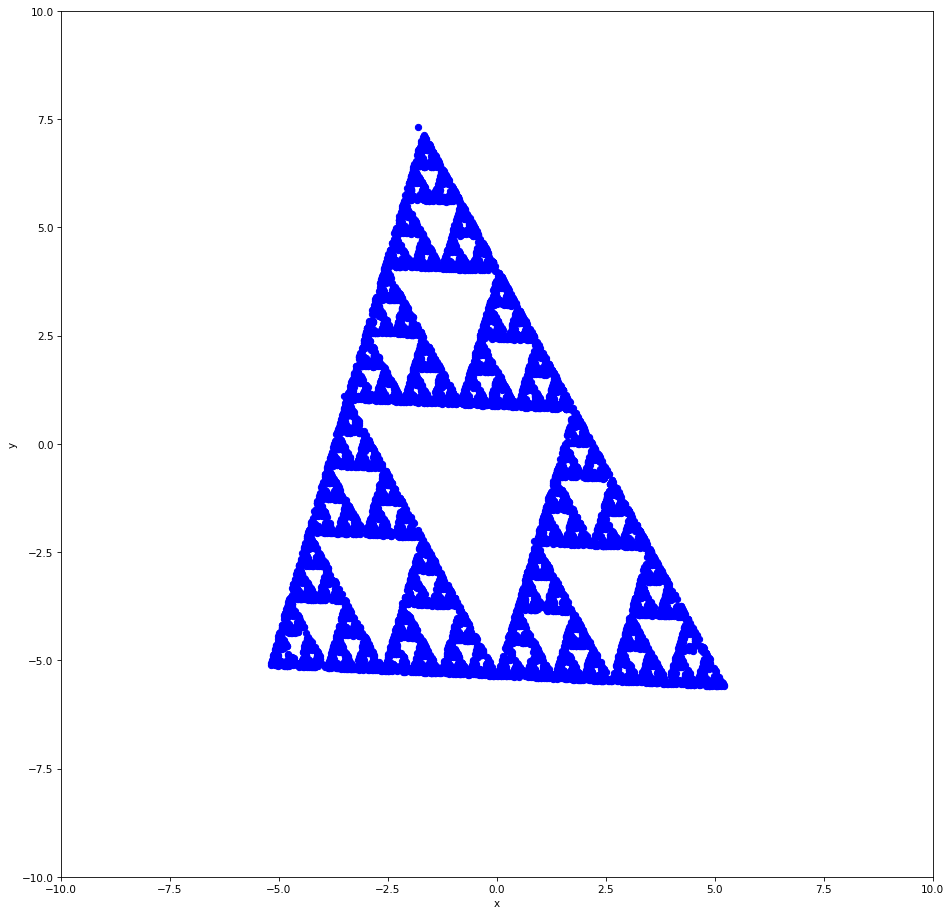

In [7]:
fig = plt.figure(figsize=(15,15))
plot_results(resultsX, resultsY)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.xlabel('x')
plt.ylabel('y')